### Introduction
This is to demonstrate how to apply Multinomial Naive Bayes model which I implement with numpy to work on document / text classification, namely SMS spam classification. The dataset is available from [UCI repository](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection).

The first task is feature engineering, it involves NLP (Natural Language Processing) on how to represent the words with numeric format. The basic method using here is [bag-of-words model](https://en.wikipedia.org/wiki/Bag-of-words_model). Sci-kit learn provides a nice tool to implement this easily with various parameters to control the output as well.

Then we can feed into the Multinomial Naive Bayes model with the training data. The model will learn the required parameters (e.g. prior probability, conditional probability) based on the training samples.

Finally we can apply the trained model to predict the unseen test data. You will be amazed how well the Naive Bayes model performs on such this task. And it is running very fast too!

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib
import matplotlib.pyplot as plt

from als import MultinomialNBClassifier
from als import KNNClassifier

matplotlib.style.use('ggplot')
%matplotlib inline

### Load the data and explore the data

In [2]:
raw_data = pd.read_csv("./smsspamcollection/SMSSpamCollection", delimiter='\t', header=None)
raw_data.columns = ['label', 'sms']
raw_data.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
raw_data['label'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

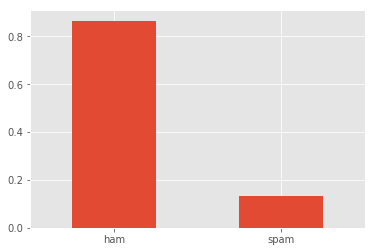

In [6]:
raw_data['label'].value_counts(normalize=True).plot(kind='bar', rot=0)

We can see this is an unbalanced dataset with the majority is ham. So the baseline of accuracy rate is **0.866** with which the model should be comparing. 

In [23]:
raw_data['length'] = raw_data['sms'].apply(lambda s: len(s.split()))
raw_data.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",20
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",13


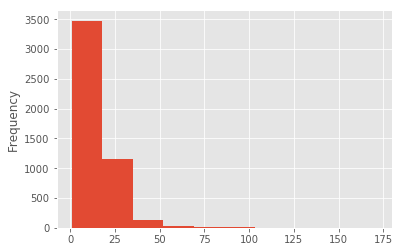

In [29]:
raw_data.loc[raw_data['label'] == 'ham', 'length'].plot(kind='hist')

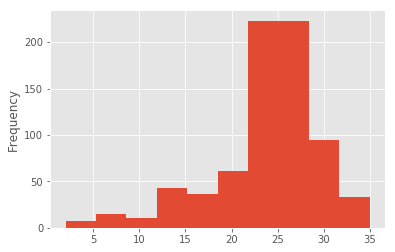

In [30]:
raw_data.loc[raw_data['label'] == 'spam', 'length'].plot(kind='hist')

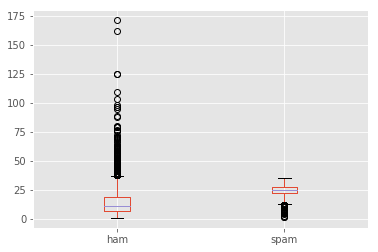

In [42]:
piv =  raw_data.pivot(index=None, columns='label', values='length')
piv.plot(kind='box')
# raw_data.groupby('label')['length'].mean()

We can see that the length of ham SMSs vary much more while most of the spam SMSs are less than 30 words.

### Split the data into training data and test data

In [3]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(raw_data['sms'].values, raw_data['label'].values, random_state=24)

In [4]:
print('Training data size: {}, test data size: {}'.format(X_train_raw.shape[0], X_test_raw.shape[0]))

Training data size: 4179, test data size: 1393


In [5]:
X_train_raw[:5]

array(['S:-)kallis wont play in first two odi:-)',
       'My tuition is at 330. Hm we go for the 1120 to 1205 one? Do you mind?',
       "Rock yr chik. Get 100's of filthy films &XXX pics on yr phone now. rply FILTH to 69669. Saristar Ltd, E14 9YT 08701752560. 450p per 5 days. Stop2 cancel",
       'I was slept that time.you there?',
       "Well there's not a lot of things happening in Lindsay on New years *sighs* Some bars in Ptbo and the blue heron has something going"], dtype=object)

### Feature engineering with bag-of-words model

In [6]:
w2v = CountVectorizer()

In [7]:
w2v.fit(X_train_raw)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [8]:
X_train = w2v.transform(X_train_raw)

In [9]:
X_train.shape

(4179, 7485)

There are total **7,485** unique words in the training data. We can use `w2v.vocabulary_` to display the dict of the mapping.

In [10]:
# w2v.vocabulary_

### Build the Multinomial Naive Bayes model and train the model

In [11]:
mNB_clf = MultinomialNBClassifier()
mNB_clf.train(X_train, y_train)

In [21]:
mNB_clf.prior

array([ 0.86360373,  0.13639627])

In [22]:
mNB_clf.feat_prob

array([[  1.83870849e-05,   1.83870849e-05,   3.67741698e-05, ...,
          3.67741698e-05,   1.83870849e-05,   3.67741698e-05],
       [  3.85189465e-04,   1.20371708e-03,   4.81486831e-05, ...,
          4.81486831e-05,   9.62973663e-05,   4.81486831e-05]])

In [13]:
mNB_clf.feat_prob_log

array([[-10.90386205, -10.90386205, -10.21071487, ..., -10.21071487,
        -10.90386205, -10.21071487],
       [ -7.86177523,  -6.72234094,  -9.94121677, ...,  -9.94121677,
         -9.24806959,  -9.94121677]])

### Transform the test data with previous bag-of-words model

In [14]:
X_test = w2v.transform(X_test_raw)

In [15]:
X_test.shape

(1393, 7485)

### Predict the test data with the Multinomial Naive Bayes model

In [16]:
y_pred = mNB_clf.predict(X_test)

### Accuracy Score!

In [20]:
sum(y_test == y_pred) / y_test.shape[0]

0.98420674802584351

In [17]:
accuracy_score(y_test, y_pred)

0.98420674802584351